# Практическое занятие №7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
MPa = 1e6
kW = 1e3
MW = 1e6

# Оценки напряжений в рабочих лопатках турбинной ступени
## Напряжение от растяжения лопаток

$$F=ma$$
$$a = \omega^2 \cdot R_{ср}$$
$$R = 0.5 d_{ср}$$
$$m = \rho_{металла} \cdot V_{металла}$$
$$F = 0.5 \cdot \rho_{металла} \cdot V_{металла} \cdot d_{ср} \cdot \omega^2$$


Для лопатки с постоянным сечением усилия в корне лопаки
$$F = 0.5 \cdot \rho_{металла} \cdot F_{сечения} \cdot l \cdot d_{ср} \cdot \omega^2$$
$$ \sigma = F / F_{сечения} $$
$$ \sigma = 0.5 \cdot \rho_{металла} \cdot l \cdot d_{ср} \cdot \omega^2$$

Для лопатки с постоянным сечением распределение напряжения по высоте лопатки можно выразить следующим образом:

$$\sigma(x) = \rho \cdot \omega^2 \cdot [r_{кор}(l - x) + 0.5(l^2 - x ^ 2)]$$

## Напряжение изгиба

В Упрощенной форме можно записать как:

$$\sigma_{изг} = \frac{G\cdot H_0\cdot\eta_{oi}\cdot l_2}{2\cdot u \cdot e \cdot z_2 \cdot W_{min}}$$

### Задача 1

Для рабочей лопатки постоянного профиля длинной 0.5 м и средний диаметр 1.0 м выполненой из стали 20Х13 (плотность 7800 кг/м3), найти максимальное значние напряжений растяжения и изгиба, а так же получить распределение напряжений по длине лопатки. Степень парциальности ступени при трех открытых РК е=0.85, количество лопаток z=126 штук. Момент их сопротивления W = 0.19 см3. Для представленных условий лопаточная мощность ступени N = 1200 кВт. Оценить как изменятся напряжения растяжения при отключении электрогенератора от сети и повышении частоты вращения ротора на 10%. Определить напряжения изгиба для режима эксплуатации с одним открытым РК (е=0.3) при котором N=900 кВт

In [54]:
l = 0.2
avg_d = 1.55
density = 7800
z = 126
n = 50
W = 0.19 * 1e-6

Из материала известно что предел текучести $\sigma_{0.2}$ = 400 МПа. Принимая коэффициент запаса прочности 1.7, допускаемые напряжения $\sigma_{р} = 235 МПа$

In [11]:
max_stress = 235 * MPa

Напряжения в корневом сечении лопатки

In [12]:
tension_stress_root_func = lambda x: 0.5 * density * (x ** 2) * avg_d * l

In [13]:
angular_speed = 2 * np.pi * n
tension_stress_root_func(angular_speed)

119323517.20917034

In [16]:
print(f"Запас прочности: {max_stress / tension_stress_root_func(angular_speed)}")

Запас прочности: 1.9694357449089641


Напряжения в корне при увеличении частоты вращения на 10%

In [18]:
increased_angular_speed = 1.1 * angular_speed
tension_stress_root_func(increased_angular_speed)

144381455.82309613

In [20]:
print(f"Запас прочности: {max_stress / tension_stress_root_func(increased_angular_speed)}")

Запас прочности: 1.6276328470322017


Распределение напряжений от растяжения по высоте

In [42]:
def tension_stress(x):
    r_root = (avg_d - l) / 2
    constant_part = density * (angular_speed ** 2)
    left = r_root * (l - x)
    right = 0.5 * ((l ** 2) - (x ** 2))
    return constant_part * (left + right)

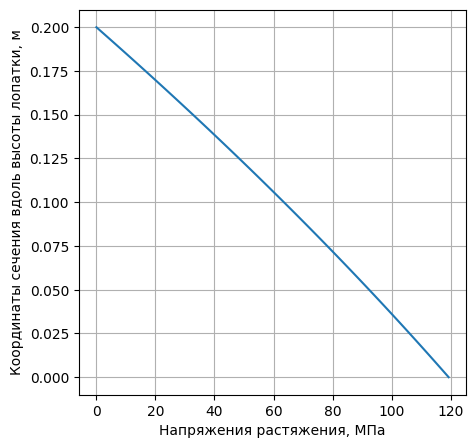

In [47]:
y = np.linspace(0, l, 100)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(tension_stress(y) / MPa, y)
ax.set_xlabel("Напряжения растяжения, МПа")
ax.set_ylabel("Координаты сечения вдоль высоты лопатки, м")
ax.grid()

Окружная скорость

In [49]:
u = np.pi * avg_d * n
u

243.47343065320896

Напряжение изгиба при открытых клапанах

In [51]:
def bending_stress(N, e):
    numenator = N * l
    denumenator = 2 * u * e * z * W
    return numenator / denumenator

In [56]:
N = 1200 * kW
e = 0.85
bending_stress(N, e) / MPa

24.220694901107855

Напряжения изгиба при одном открытом клапане

In [57]:
N = 900 * kW
e = 0.3
bending_stress(N, e) / MPa

51.46897666485419

Обычно принимаю для ступеней активного типа с е<1 значения допускаемых напряжений на изгиб порядка 15-20 МПа. Так как выбранная хорда профиля рабочей лопатки не обеспечивает необходимого значения допускаемого напряжения, то значение хорды для выполнения условий прочности определяется по формуле $b^{new} = b \cdot \sqrt{\sigma_{изгиб} / \sigma_{доп}} $

# Расчет напряжений в дисках

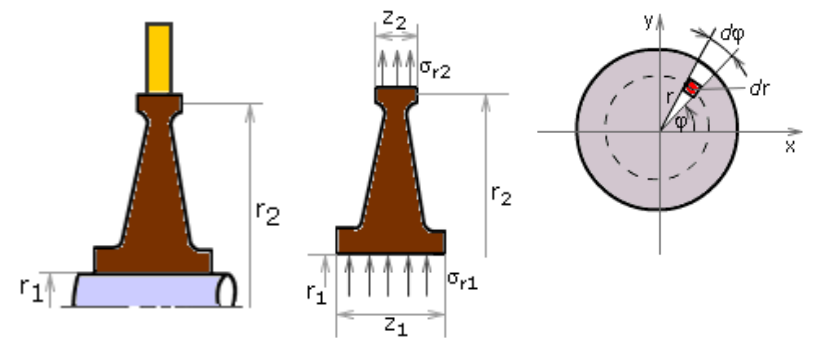

Формулы для определения радиальных и тангенсальных напряжений в диске постоянной толщины с отверстием имеют следующий вид:


$$
\sigma_{r}(r) = \frac{r_2^2}{r_2^2 - r_1^2}(1 - \frac{r_1^2}{r^2})\sigma_{r2}
-\frac{r_2^2 - r^2}{r_2^2 - r_1^2}\frac{r_1^2}{r^2}\sigma_{r1}
+\frac{3 + \nu}{8}(r_2^2 + r_1^2 - \frac{r_1^2 r_2^2}{r^2} - r^2)\rho\omega^2
$$


$$
\sigma_{\theta}(r) = \frac{r_2^2}{r_2^2 - r_1^2}(1 + \frac{r_1^2}{r^2})\sigma_{r2}
-\frac{r_2^2 + r^2}{r_2^2 - r_1^2}\frac{r_1^2}{r^2}\sigma_{r1}
+\frac{3 + \nu}{8}(r_2^2 + r_1^2 + \frac{r_1^2 r_2^2}{r^2} - \frac{1 + 3 \nu}{3 + \nu}r^2)\rho\omega^2
$$


Где $\sigma_{r2}$ - напряжения на переферии диска. Например от лопаток. $\sigma_{r1}$ - напряжения на расточке диска, например от посадки

В диске с отверстием радиальные напряжения имеют максимум между радиусами $r_1$ и $r_2$. Тангенциальные напряжения максимальны на поверхности отверстия и всюду растягивающие. В диске, посаженном на вал с натягом, на расточке имеют место сжимающие радиальные напряжения. 

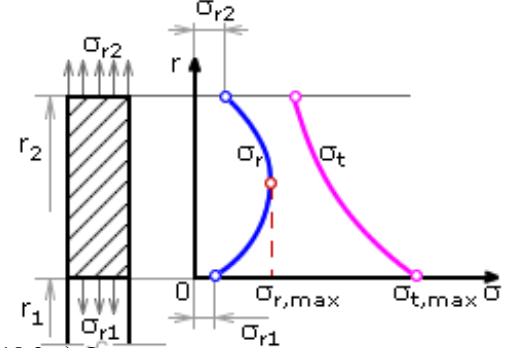

Для диска без отверстия

$$
\sigma_{r}(r) =\frac{3 + \nu}{8}\rho\omega^2(r_2^2 - r^2) + \sigma_{r2}
$$

$$
\sigma_{\theta}(r) =\frac{3 + \nu}{8}\rho\omega^2(r_2^2 - \frac{1 + 3 \nu}{3 + \nu}r^2) + \sigma_{r2}
$$

Где $\nu$ – коэффициент Пуассона (отношение относительной поперечной деформации к относительной продольной).

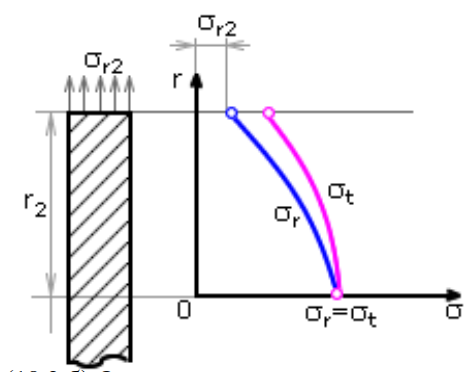

Для дисков переменной толщины применяются иные методы. Например методом трех расчетов

### Задача 2

Определить максимальные напряжения и запас прочности для дисков постоянной толщины, выполненных с отверстием и без него. Известно напряжение от лопаточной нагрузки 100 МПа. Соответствующие радиусы дисков: внешний 0.55 м, внутренний 0.22 м. Диски выполнены из стали 34ХМА для которой предел длительной прочности 510 МПа, плотность 7800 кг/м3

In [111]:
nu = 0.3
r1 = 0.22
r2 = 0.55
sigma_1 = 0
sigma_2 = 100 * MPa
density = 7800
n = 50

angular_speed = 2 * np.pi * n

nu = 0.3

max_stress = 510 * MPa

Для диска с отверстием

In [103]:
def sigma_r(r, r1, r2, sigma_1, sigma_2):
    first = (r2 ** 2 / (r2**2 - r1**2)) * (1 - (r1**2)/(r**2)) * sigma_2
    second = ((r2**2 - r**2) * r1**2) * sigma_1 / ((r2**2 - r1**2)*(r**2))
    brackets = r2**2 + r1**2 - (r1**2 * r2**2) / r**2 - r**2
    third = (3 + nu) * brackets * density * angular_speed ** 2
    return first - second + third


def sigma_theta(r, r1, r2, sigma_1, sigma_2):
    first = (r2 ** 2 / (r2**2 - r1**2)) * (1 + (r1**2)/(r**2)) * sigma_2
    second = ((r2**2 + r**2) * r1**2) * sigma_1 / ((r2**2 - r1**2)*(r**2))
    innet_brackets = (1 + 3 * nu) * (r**2) / (3 + nu)
    brackets = r2**2 + r1**2 + ((r1**2) * ((r2**2)) / (r**2)) - innet_brackets
    third = ((3 + nu) / 8) * brackets * density * angular_speed ** 2
    return first - second + third

In [104]:
sigma_r(r1, r1=r1, r2=r2, sigma_1=sigma_1, sigma_2=sigma_2) / MPa, sigma_r(r2, r1=r1, r2=r2, sigma_1=sigma_1, sigma_2=sigma_2) / MPa

(0.0, 100.0)

In [105]:
sigma_theta(r1, r1=r1, r2=r2, sigma_1=sigma_1, sigma_2=sigma_2) / MPa, sigma_theta(r2, r1=r1, r2=r2, sigma_1=sigma_1, sigma_2=sigma_2) / MPa

(436.73617650991713, 209.58734605925505)

In [112]:
print("Коэффициент запаса прочности: ", max_stress/sigma_theta(r1, r1=r1, r2=r2, sigma_1=sigma_1, sigma_2=sigma_2))

Коэффициент запаса прочности:  1.1677530450432454


Для диска без отверстия

In [117]:
def sigma_r(r, r2, sigma_2):
    a = (3 + nu) / 8
    return a * density * (angular_speed ** 2) * (r2**2 - r**2) + sigma_2

def sigma_theta(r, r2, sigma_2):
    a = (3 + nu) / 8
    b = (1 + 3 * nu) / (3 + nu)
    return a * density * (angular_speed ** 2) * (r2**2 - b * r**2) + sigma_2

In [118]:
sigma_r(0, r2=r2, sigma_2=sigma_2) / MPa, sigma_r(r2, r2=r2, sigma_2=sigma_2) / MPa

(196.06024278552772, 100.0)

In [119]:
sigma_theta(0, r2=r2, sigma_2=sigma_2) / MPa, sigma_theta(r2, r2=r2, sigma_2=sigma_2) / MPa

(196.06024278552772, 140.75283027264808)

In [120]:
print("Коэффициент запаса прочности: ", max_stress/sigma_theta(0, r2=r2, sigma_2=sigma_2))

Коэффициент запаса прочности:  2.6012412958087285


Запас прочности при таком значении напряжения может оказаться не достаточным. Одним из способов повышения запаса прочности является исполнение диска со ступицей, позволяющей сократить уровень напряжений на расточке.

# Оценка надежности ротора паровой турбины

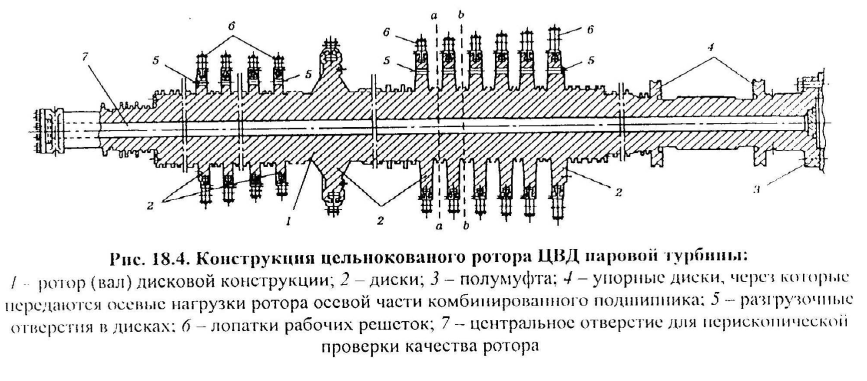

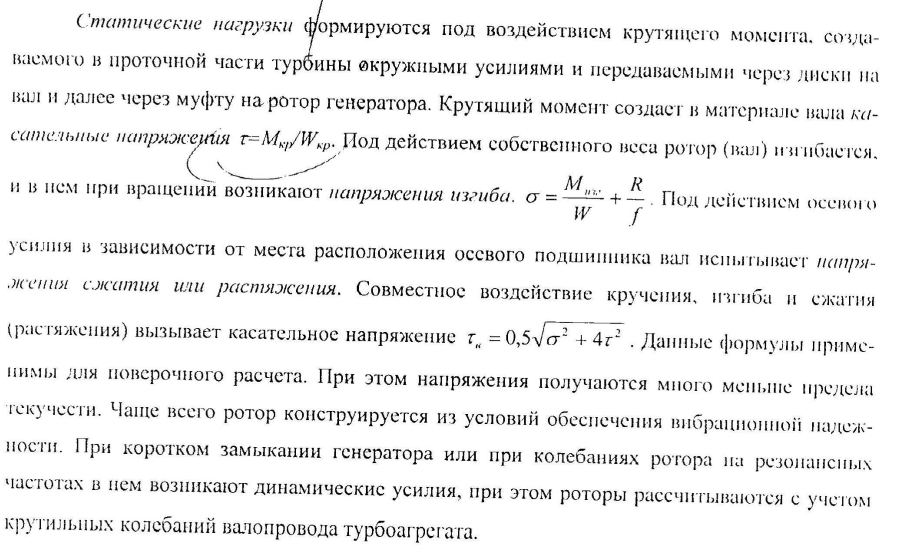

### Задача 3

Определить запас прочности по касательным напряжениям в шейке ротора диаметром 0.325 м, находящейся в обоасти осерадиального подшипника ЦВД турбины. Эффективная мощность 115 МВт. Допустимые касательные напряжения металла 331 МПа

In [130]:
N = 115 * MW
d = 0.325
n = 50
max_tan_stress = 331 * MPa

Крутящий момент исходя из мощности

In [125]:
moment = N / (2 * np.pi * n)
moment

366056.3691113593

Момент сопротивления посчитанный для окружности

In [127]:
W = np.pi * d ** 3 / 16
W

0.006740311581969508

Касательные напряжения

In [129]:
tau = moment / W
tau / MPa

54.308523376065985

In [131]:
print("Коэффициент запаса прочности: ", max_tan_stress / tau)

Коэффициент запаса прочности:  6.094807581269522


Следует помнить, что в условияъ короткого замыкания электрогенератора в роторе возникают динамические составляющие сложного напряженного состояния. Поэтому обычно принимают условие о том, что коэффициент запаса прочности должен быть 4-6

# Оценка вибрационной надежности пакета рабочих лопаток